<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [60]:
import re
import string

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import spacy
from spacy.tokenizer import Tokenizer
from collections import Counter
from sklearn.neighbors import NearestNeighbors

from bs4 import BeautifulSoup
import requests

In [35]:
import squarify
nlp = spacy.load("en_core_web_lg")

In [36]:
data = pd.read_csv('./data/job_listings.csv', index_col=0)
print(data.shape)
data.head(1)

(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist


In [37]:
data['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [38]:
def data_cleaning(text):
    text = text[1:]
    text = text.replace('\\n', '')
    text = BeautifulSoup(text, "lxml").get_text()
    text = text.replace('/', '')
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    text = text.lower()
    text = re.sub(r'(x.[0-9])', '', text)                      
    return text

In [39]:
for i in range (0, len(data)):
    data['description'][i] = data_cleaning(data['description'][i])

In [40]:
data['description'][0]

'job requirementsconceptual understanding in machine learning models like naive bayes kmeans svm apriori linear logistic regression neural random forests decision trees knn along with handson experience in at least 2 of themintermediate to expert level coding skills in pythonr ability to write functions clean and efficient data manipulation are mandatory for this roleexposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in rability to communicate model findings to both technical and nontechnical stake holdershands on experience in sqlhive or similar programming languagemust show past work via github kaggle or any other published articlemasters degree in statisticsmathematicscomputer science or any other quant specific fieldapply now'

In [41]:
data.head(10)

,description,title
0,job requirementsconceptual understanding in ma...,Data scientist
1,job descriptionas a data scientist 1 you will ...,Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,4969 6756 a monthcontractunder the general su...,Data Scientist
4,location usa multiple locations2 years of ana...,Data Scientist
5,create various business intelligence analytica...,Data Scientist
6,as spotify premium swells to over 96m subscrib...,Associate Data Scientist – Premium Analytics
7,everytown for gun safety the nations largest g...,Data Scientist
8,ms in a quantitative discipline such as statis...,Sr. Data Scientist
9,slack is hiring experienced data scientists to...,"Data Scientist, Lifecyle"


## 2) Use Spacy to tokenize the listings 

In [42]:
nlp = spacy.load("en_core_web_lg")
# set the tokenizer on nlp.vocab.
tokenizer = Tokenizer(nlp.vocab)

In [43]:
print(nlp.Defaults.stop_words)

{'ca', 'elsewhere', 'made', 'hereupon', 'around', 'cannot', 'everyone', 'his', 'whom', 'i', 'not', 'doing', 'two', "n't", 'from', 'latter', 'yours', 'thence', 'besides', 'such', 'nor', 'mostly', 'sixty', 'that', 'each', 'into', 'seems', 'whatever', 'afterwards', 'namely', 'neither', 'although', 'have', 're', 'myself', 'serious', 'least', 'always', 'whereas', 'give', '‘re', 'wherever', 'which', 'your', 'hereby', 'twenty', 'could', 'did', 'get', 'last', 'both', 'out', 'five', 'beforehand', 'eleven', 'hereafter', 'without', 'does', 'who', 'below', 'then', 'if', 'go', 'several', '‘ll', 'rather', 'otherwise', 'would', 'part', 'up', 'full', 'nowhere', 'about', 'ours', 'put', 'he', 'nine', 'across', 'whoever', 'show', 'mine', 'under', 'take', 'whenever', "'d", '‘d', 'bottom', 'more', 'what', 'because', 'again', 'its', 'you', 'onto', 'where', 'any', 'beyond', 'therefore', 'whose', 'we', '’s', 'really', 'please', 'yet', 'are', '‘s', 'never', 'this', 'another', 'well', 'already', 'alone', 'been'

In [44]:
# add stop words to the nlpDefaults stop words list.
STOP_WORDS = nlp.Defaults.stop_words.union(['datum', 'year', 'apply', 'understand', 'work',
                                            'opportunity', 'new', 'use', 'ability', 'company', 
                                            'include'])

In [45]:
# TOKENIZER PIPE, removing stop words, blank words, and lemmatizing.
tokens = []

for doc in tokenizer.pipe(data['description']):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

data['tokens'] = tokens
data['tokens'].head()

0    [job, requirementsconceptual, machine, learn, ...
1    [job, descriptionas, scientist, 1, help, build...
2    [scientist, consult, business, responsible, an...
3    [4969, 6756, monthcontractunder, general, supe...
4    [location, usa, multiple, locations2, analytic...
Name: tokens, dtype: object

In [46]:
# create a function to count all words in the dataframe.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [47]:
# create a data frame for the word counts.
wc = count(data['tokens'])
# show the data frame with headers.
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
289,team,360,1211,1.0,0.010632,0.010632,0.845070
5,experience,374,1181,2.0,0.010369,0.021001,0.877934
295,business,318,1144,3.0,0.010044,0.031045,0.746479
10,model,317,1079,4.0,0.009473,0.040519,0.744131
49,learn,325,974,5.0,0.008552,0.049070,0.762911
17,science,328,906,6.0,0.007954,0.057025,0.769953
83,product,267,811,7.0,0.007120,0.064145,0.626761
512,analysis,289,692,8.0,0.006076,0.070221,0.678404
38,machine,274,675,9.0,0.005926,0.076147,0.643192
134,scientist,325,658,10.0,0.005777,0.081924,0.762911


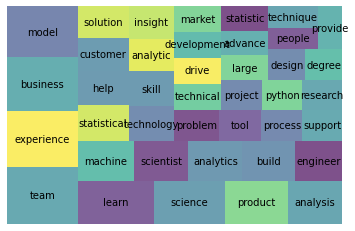

In [50]:
# set the top 20 word counts.
wc_top20 = wc[wc['rank'] <= 40]
# use squarify to plot top 20.
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.69 )
# remove the axis.
plt.axis('off')
# show the plot.
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [51]:
# create a function to use the spacy tokenizer.
def tokenize(document):    
    doc = nlp(document)   
    return [token.lemma_.strip() 
    for token in doc if (token.is_stop != True) 
    and 
    (token.is_punct != True) and
    (token.text != ' ')]

In [53]:
# set the transformer, instantiate.
vect = CountVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)
# fit the trasnformer on the data.
vect.fit(data['description'])
# transform the data.
dtm = vect.transform(data['description'])
# get the word counts for each document.
dtm_wc = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
# show the dataframe with headers.
dtm_wc.head()

,,-PRON-,0,02,02115job,030microsoft,031819,032519,041819,06366,...,zeus,zf,zfs,zheng,zillow,zillows,zonesability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [54]:
sum_words = dtm.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

[('team', 1209),
 ('data', 1189),
 ('business', 1144),
 ('experience', 1119),
 ('science', 898),
 ('product', 810),
 ('model', 805),
 ('analytic', 700),
 ('analysis', 688),
 ('machine', 675)]

In [55]:
# create a data frame of the 20 most frequest words.
cv_top20 = pd.DataFrame(words_freq[:20]) 
# show the data frame with headers.
cv_top20.head()

,0,1
0,team,1209
1,data,1189
2,business,1144
3,experience,1119
4,science,898


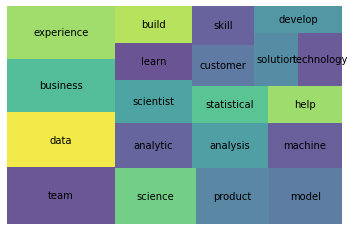

In [56]:
# use squarify to plot top 20.
squarify.plot(sizes=cv_top20[1], label=cv_top20[0], alpha=.8 )
# remove axis.
plt.axis('off')
# show the plot.
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [58]:
# set the transformer, instantiate.
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)
# fit the trasnformer on the data.
tfidf.fit(data['description'])
# transform the data.
dtm = tfidf.transform(data['description'])
# get the word counts for each document.
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
# show the dataframe with headers.
dtm.head()

,,-PRON-,0,02,02115job,030microsoft,031819,032519,041819,06366,...,zeus,zf,zfs,zheng,zillow,zillows,zonesability,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108747,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [61]:
# set NN.
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
# fit NN on data.
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [67]:
ideal_job = ["""The ideal job is remotely working at my mighty cozy alaskan cabin with my dogs and the snow."""]

In [68]:
# query for Sim of Random doc to BBC.
new = tfidf.transform(ideal_job)
# show the dense matrix.
nn.kneighbors(new.todense())

(array([[1.29509326, 1.33643167, 1.33643167, 1.35813318, 1.35813318,
         1.367268  , 1.36894634, 1.36894634, 1.3718243 , 1.37326951]]),
 array([[ 17, 242,  63,  23, 123, 116,  90,  50, 353,  92]]))

In [70]:
data['description'][323]

'about the rolebabylist is looking for a data analyst to join our growing operations and strategy team partnering with our data scientist you will be focused on empowering decisionmaking through data for both internal and external stakeholders you will be responsible for delivering datadriven actionable insights that contribute to our business in this role you will help scope build and maintain key dashboards support stakeholders in using data to answer strategic questions and deliver datadriven insights to drive the business forward your work will have immediate impact across the company and you will be in a uniquely crossdiscipline role working with nearly every team in the companyrequirementswhat youll doyou will own business intelligence and consumer insights at babylist both internally and externally you will create and maintain our business dashboards and reports to track ongoing business metrics performance of ab tests and special projects with brand partnersyoull gather data fr

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 